In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Text(0, 0.5, 'Output intensity')

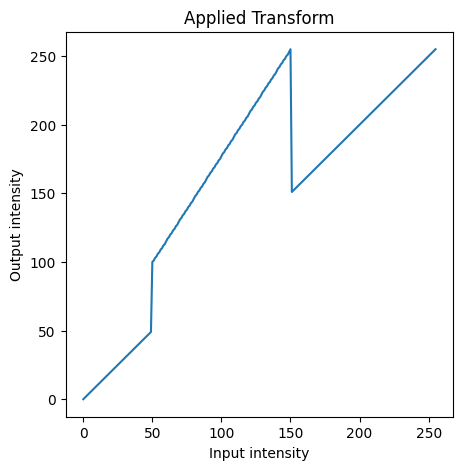

In [4]:
# Question 1

x_start, x_end = 50, 150
y_start, y_end = 100, 255

transform = np.arange(0, 256).astype(np.uint8)
transform[x_start: x_end+1] = np.linspace(y_start, y_end, (x_end - x_start + 1), np.uint8)

plt.figure(figsize = (5, 5))
plt.plot(transform)
plt.title("Applied Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

(-0.5, 719.5, 809.5, -0.5)

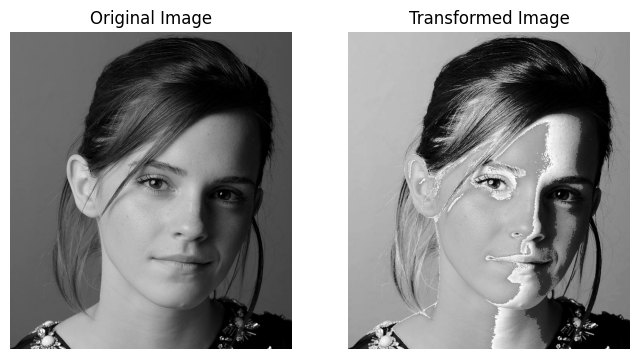

In [5]:
img1 = cv.imread( "images/emma.jpg", cv.IMREAD_GRAYSCALE)
transformed_img1 = transform[img1]

plt.figure(figsize = (8, 8))
plt.subplot(121)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(transformed_img1, cv.COLOR_BGR2RGB))
plt.title("Transformed Image")
plt.axis('off')

Text(0, 0.5, 'Output intensity')

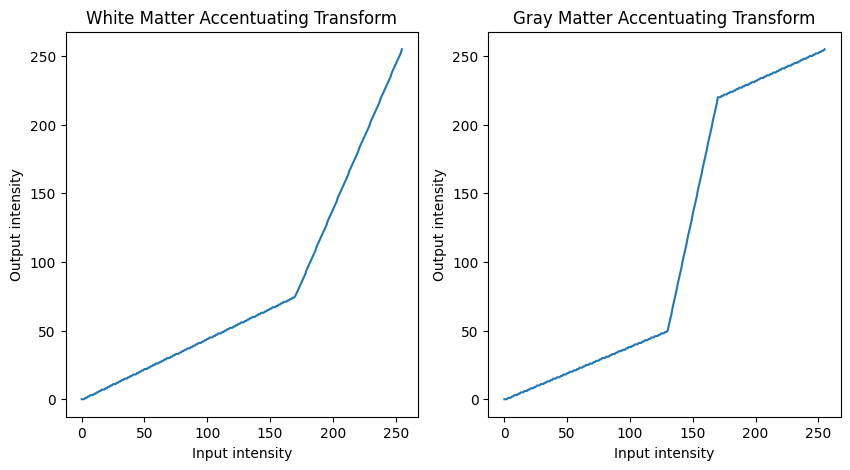

In [6]:
# Question 2

# White matter
x_midpoint = 170
y_midpoint = 75

white_transform = np.arange(0, 256).astype(np.uint8)
white_transform[0:x_midpoint + 1] = np.linspace(0, y_midpoint, x_midpoint + 1, np.uint8)
white_transform[x_midpoint:256] = np.linspace(y_midpoint, 255, (256 - x_midpoint), np.uint8)

# Grey matter
x1, x2 = 130, 170
y1, y2 = 50, 220

grey_transform = np.arange(0, 256).astype(np.uint8)
grey_transform[0:x1 + 1] = np.linspace(0, y1, x1 + 1, np.uint8)
grey_transform[x1:x2 + 1] = np.linspace(y1, y2, (x2 + 1 - x1), np.uint8)
grey_transform[x2:256] = np.linspace(y2, 255, (256 - x2), np.uint8)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(white_transform)
plt.title("White Matter Accentuating Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

plt.subplot(122)
plt.plot(grey_transform)
plt.title("Gray Matter Accentuating Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

(-0.5, 180.5, 216.5, -0.5)

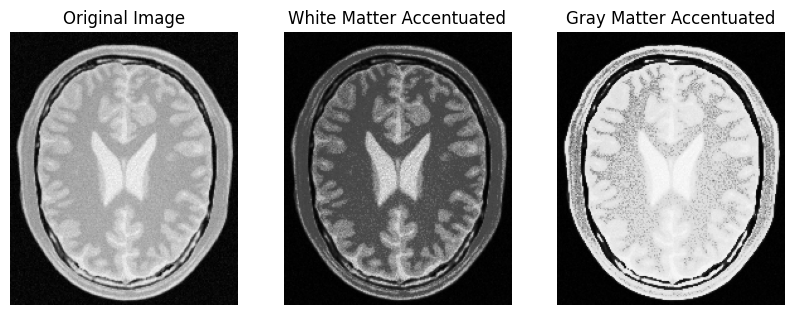

In [7]:
img2 = cv.imread( "images/BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
white_img2 = white_transform[img2]
gray_img2 = grey_transform[img2]

plt.figure(figsize = (10, 10))
plt.subplot(131)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(132)
plt.imshow(cv.cvtColor(white_img2, cv.COLOR_BGR2RGB))
plt.title("White Matter Accentuated")
plt.axis('off')
plt.subplot(133)
plt.imshow(cv.cvtColor(gray_img2, cv.COLOR_BGR2RGB))
plt.title("Gray Matter Accentuated")
plt.axis('off')

(-0.5, 719.5, 479.5, -0.5)

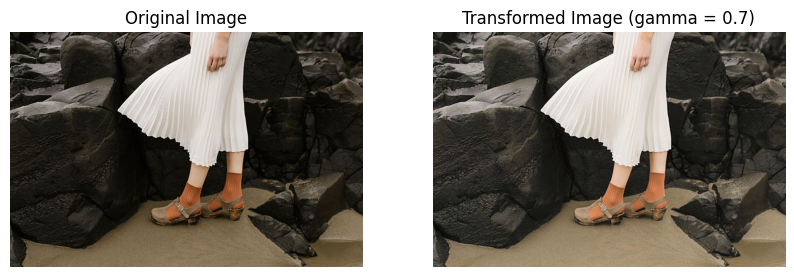

In [8]:
# Question 3

gamma = 0.7
gamma_transform = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

img3 = cv.imread( "images/highlights_and_shadows.jpg", cv.IMREAD_COLOR)
img3_lab = cv.cvtColor(img3, cv.COLOR_BGR2LAB)
# In the LAB colour space, the L plane encodes brightness only

img3_lab[:, :, 0] = gamma_transform[img3_lab[:, :, 0]]

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(img3_lab, cv.COLOR_LAB2RGB))
plt.title(f"Transformed Image (gamma = {gamma})")
plt.axis('off')



In [9]:
def histBGR(img):
    # Define colors (b for blue, g for green, r for red)
    colors = ('b', 'g', 'r')

    # Loop over color channels and calculate histograms
    for i, color in enumerate(colors):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

Text(0, 0.5, 'Count')

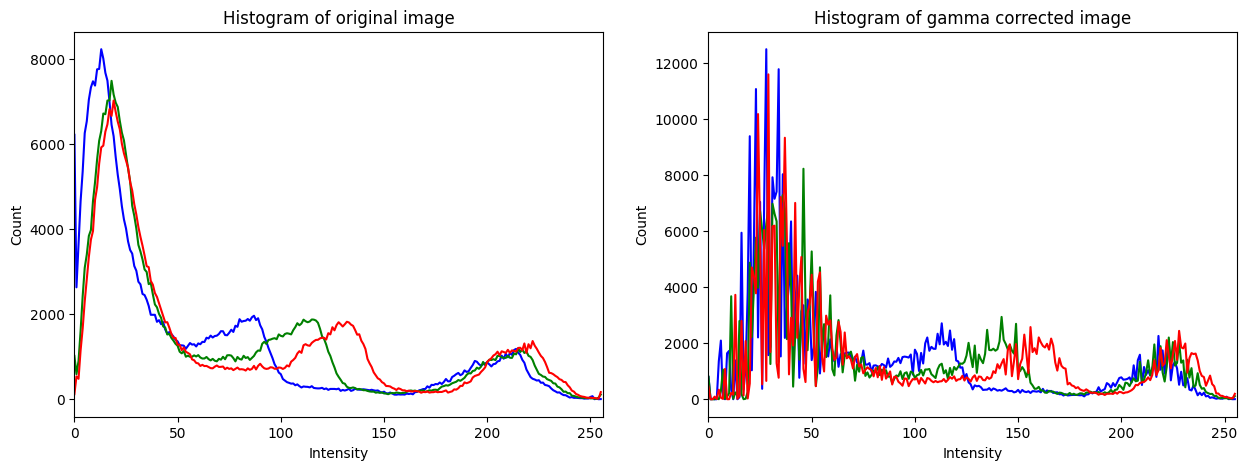

In [10]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
histBGR(img3)
plt.title("Histogram of original image")
plt.xlabel("Intensity")
plt.ylabel("Count")

plt.subplot(122)
histBGR(cv.cvtColor(img3_lab, cv.COLOR_LAB2BGR))
plt.title("Histogram of gamma corrected image")
plt.xlabel("Intensity")
plt.ylabel("Count")

Text(0, 0.5, 'Output intensity')

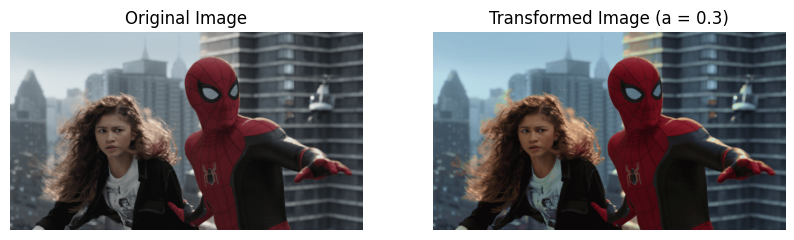

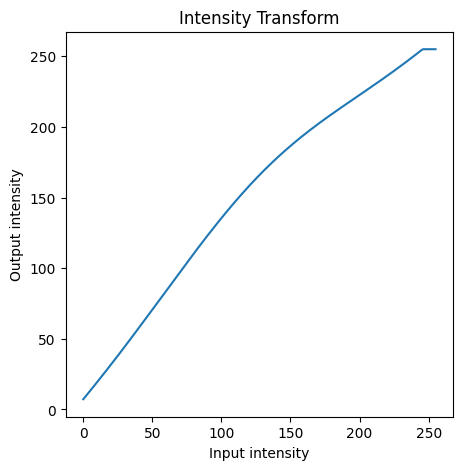

In [11]:
# Question 4
a = 0.3
sigma = 70
def f(x):
    return np.minimum(255, x + (a*128) * np.exp(-(x - 128)**2 / (2 * sigma**2)))

img4 = cv.imread( "images/spider.png", cv.IMREAD_COLOR)
img4_hsv = cv.cvtColor(img4, cv.COLOR_BGR2HSV)
# In the LAB colour space, the L plane encodes brightness only
img4_hsv[:, :, 1] = f(img4_hsv[:, :, 1])
plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(img4_hsv, cv.COLOR_HSV2RGB))
plt.title(f"Transformed Image (a = {a})")
plt.axis('off')

plt.figure(figsize = (5, 5))
transform_vibrance = [f(x) for x in range(256)]
plt.plot(transform_vibrance)
plt.title("Intensity Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

Text(0.5, 1.0, 'Histogram after equalization')

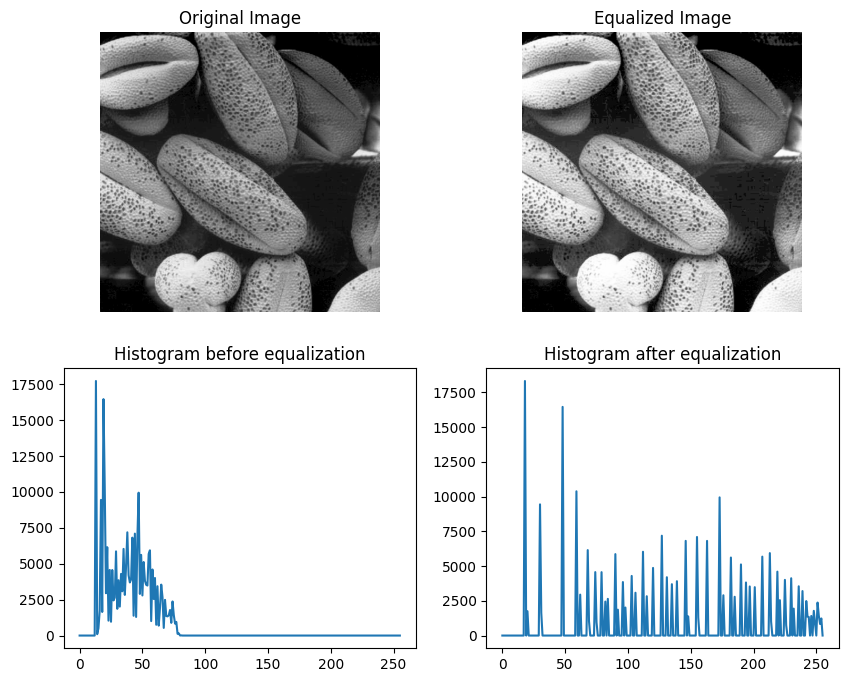

In [12]:
# Question 5

def hist_equalize(image):
    total = image.shape[0] * image.shape[1]
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    transform = (cdf * 255 / total).astype(np.uint8)
    equalized_image = transform[image]
    return equalized_image

img5 = cv.imread( "images/shells.tif", cv.IMREAD_GRAYSCALE)
equalized_img5 = hist_equalize(img5)

before_hist, _ = np.histogram(img5.ravel(), 256, [0, 256])
after_hist, _ = np.histogram(equalized_img5.ravel(), 256, [0, 256])

plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.imshow(img5, cmap = 'gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(222)
plt.imshow(equalized_img5, cmap = 'gray')
plt.title("Equalized Image")
plt.axis('off')
plt.subplot(223)
plt.plot(before_hist)
plt.title("Histogram before equalization")
plt.subplot(224)
plt.plot(after_hist)
plt.title("Histogram after equalization")

## Question 6

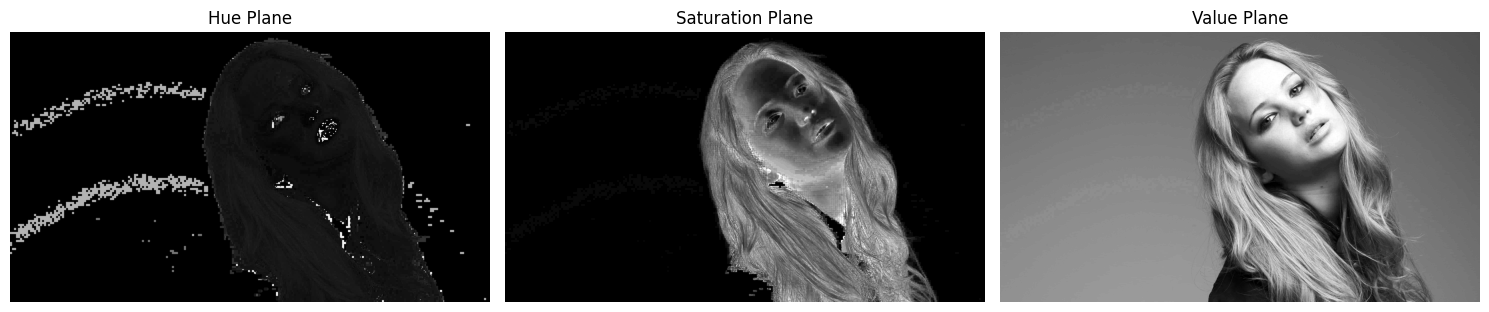

In [13]:
img6 = cv.imread( "images/jeniffer.jpg", cv.IMREAD_COLOR)
img6_hsv = cv.cvtColor(img6, cv.COLOR_BGR2HSV)

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(img6_hsv[:, :, 0], cmap = 'gray')
plt.title("Hue Plane")
plt.axis('off')
plt.subplot(132)
plt.imshow(img6_hsv[:, :, 1], cmap = 'gray')
plt.title("Saturation Plane")
plt.axis('off')
plt.subplot(133)
plt.imshow(img6_hsv[:, :, 2], cmap = 'gray')
plt.title("Value Plane")
plt.axis('off')
plt.tight_layout()

(-0.5, 3839.5, 2159.5, -0.5)

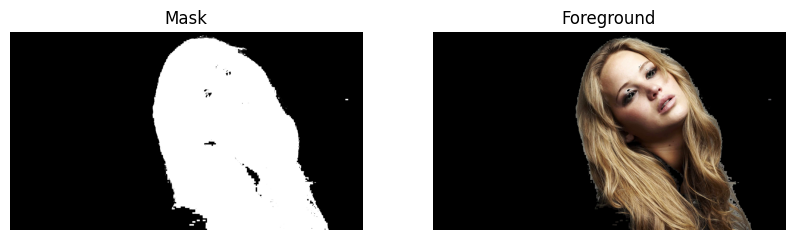

In [14]:
# Saturation plane can be used to extract the foreground
sat_plane = img6_hsv[:, :, 1]
threshold = 12
mask = (sat_plane > threshold).astype(np.uint8) * 255 
mask_3d = np.repeat(mask[:, :, None], 3, axis=2)

foreground_hsv = np.bitwise_and(img6_hsv, mask_3d)
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(mask_3d)
plt.title('Mask')
plt.axis('off')
plt.subplot(122)
plt.imshow(foreground_rgb)
plt.title('Foreground')
plt.axis('off')


Text(0.5, 1.0, 'Cumulative sum of histogram of foreground')

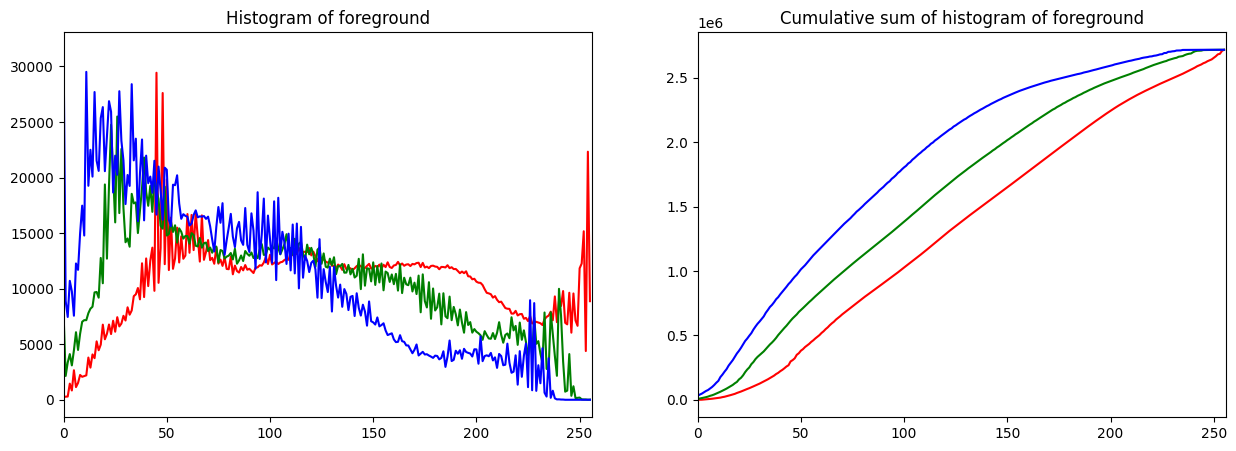

In [15]:
equalized_foreground = foreground_rgb.copy()

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
colors = ('r', 'g', 'b')

total = mask.sum() // 255

# Loop over color channels and calculate histograms
for i, color in enumerate(colors):
    hist = cv.calcHist([foreground_rgb], [i], mask, [256], [0, 256])
    ax[0].plot(hist, color=color)
    ax[0].set_xlim([0, 256])

    cumulative = np.cumsum(hist)
    ax[1].plot(cumulative, color=color)
    ax[1].set_xlim([0, 256])

    transform = cumulative * 255 / total
    equalized_foreground[:, :, i] = transform[foreground_rgb[:, :, i]]

# Remove background again after equalization
equalized_foreground = np.bitwise_and(equalized_foreground, mask_3d)

ax[0].set_title("Histogram of foreground")
ax[1].set_title("Cumulative sum of histogram of foreground")

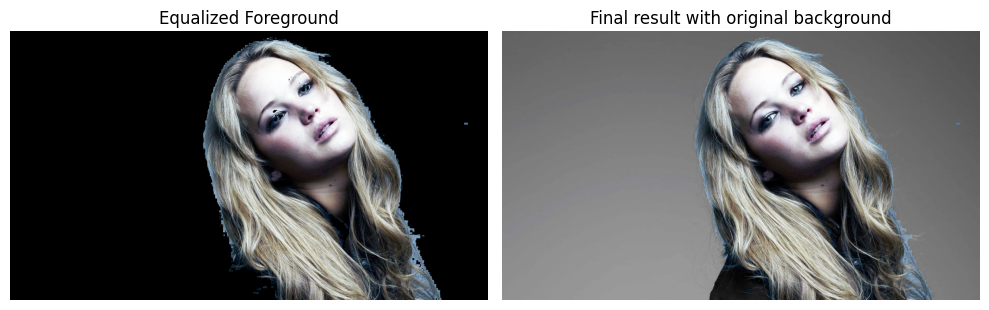

In [16]:
background_mask_3d = 255 - mask_3d
background_hsv = np.bitwise_and(img6_hsv, background_mask_3d)
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)

final_image = background_rgb + equalized_foreground

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(equalized_foreground)
plt.title('Equalized Foreground')
plt.axis('off')
plt.subplot(122)
plt.imshow(final_image)
plt.title('Final result with original background')
plt.axis('off')
plt.tight_layout()

## Question 7

In [17]:
# Function for filtering
def filter(image , kernel): 
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    #kernel = np.flipud(np.fliplr(kernel))
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0, 1, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image_float[m-k_hh: m+k_hh+1, n-k_hw: n+k_hw+1].flatten(), kernel.flatten())

    result = result * 255
    result = np.minimum(255, np.maximum(0, result)).astype(np.uint8) # Limit between 0 and 255
    return result

In [18]:
def filter_in_steps(image, kernel1, kernel2):

    # Define filtering for an already normalized image without any rounding
    def filter_step(image, kernel):
        assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
        #kernel = np.flipud(np.fliplr(kernel))
        k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
        h, w = image.shape
        result = np.zeros(image.shape, 'float')
        for m in range(k_hh, h - k_hh):
            for n in range(k_hw, w - k_hw):
                result[m, n] = np.dot(image[m-k_hh: m+k_hh+1, n-k_hw: n+k_hw+1].flatten(), kernel.flatten())
        return result

    image_float = cv.normalize(image.astype('float'), None, 0, 1, cv.NORM_MINMAX)
    result = filter_step(filter_step(image_float, kernel1), kernel2)
    result = result * 255
    result = np.minimum(255, np.maximum(0, result)).astype(np.uint8) # Limit between 0 and 255
    return result

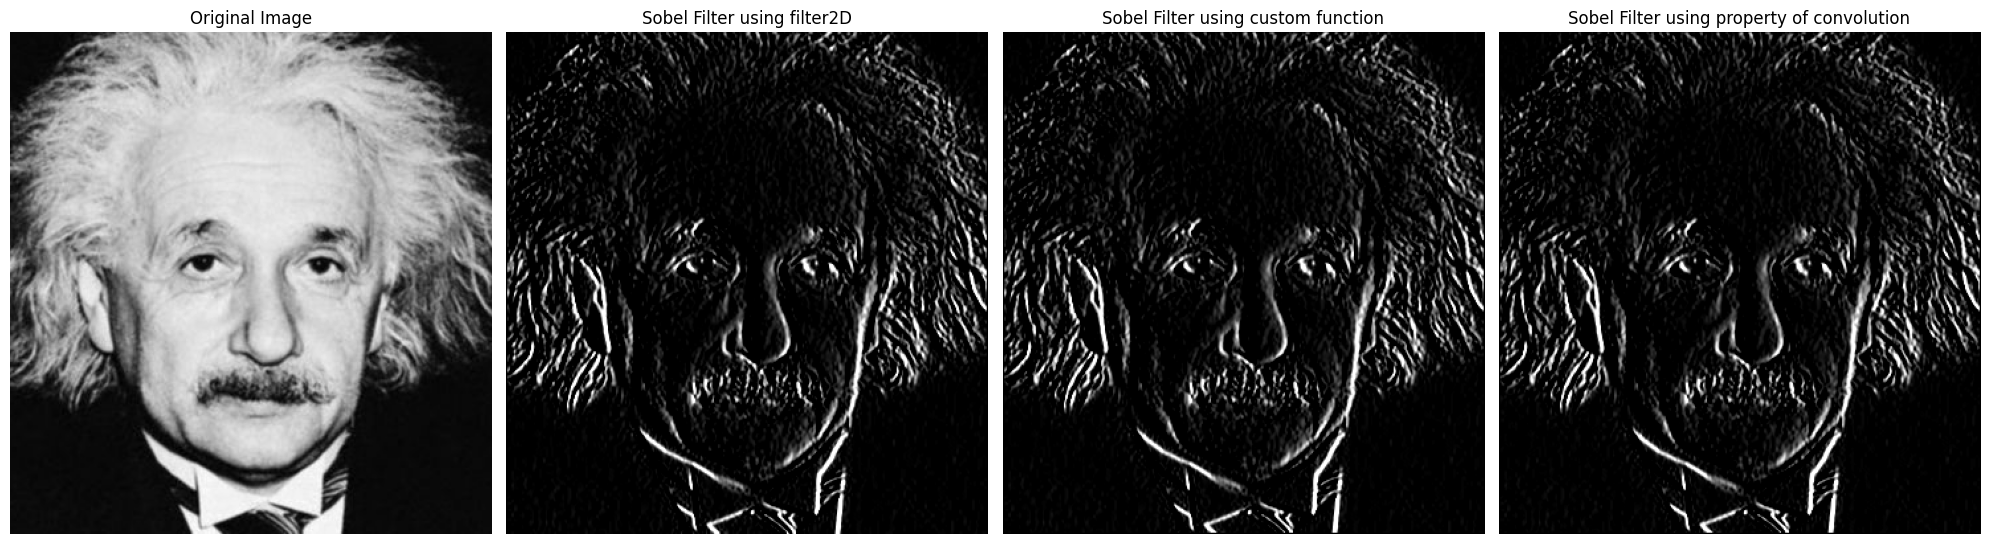

In [19]:
img7 = cv.imread( "images/einstein.png", cv.IMREAD_GRAYSCALE)

# Use a Sobel vertical kernel
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
img7_a = cv.filter2D(img7, -1, kernel)
img7_b = filter(img7, kernel)

kernel1 = np.array([1, 2, 1]).reshape((3, 1))
kernel2 = np.array([1, 0, -1]).reshape((1, 3))
img7_c = filter_in_steps(img7, kernel1, kernel2)

plt.figure(figsize = (20, 10))
plt.subplot(141)
plt.imshow(img7, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(142)
plt.imshow(img7_a, cmap = 'gray')
plt.title('Sobel Filter using filter2D')
plt.axis('off')
plt.subplot(143)
plt.imshow(img7_b, cmap = 'gray')
plt.title('Sobel Filter using custom function')
plt.axis('off')
plt.subplot(144)
plt.imshow(img7_c, cmap = 'gray')
plt.title('Sobel Filter using property of convolution')
plt.axis('off')
plt.tight_layout()

## Question 8

In [113]:
# For a colour image

def interpolate(image, indices, type):
    if type == 'nn':
        indices[0] = np.minimum(np.round(indices[0]), image.shape[0] - 1)
        indices[1] = np.minimum(np.round(indices[1]), image.shape[1] - 1)
        indices = indices.astype(np.uint64)
        return image[indices[0], indices[1]]
    
    elif type == 'bi':
        floors = np.floor(indices).astype(np.uint64)
        ceils = floors + 1

        ceils_limited = [np.minimum(ceils[0], image.shape[0] - 1), np.minimum(ceils[1], image.shape[1] - 1)]

        p1 = image[floors[0], floors[1]]
        p2 = image[floors[0], ceils_limited[1]]
        p3 = image[ceils_limited[0], floors[1]]
        p4 = image[ceils_limited[0], ceils_limited[1]]

        # Repeat indices for the 3 color planes
        indices = np.repeat(indices[:, :, :, None], 3, axis=3)
        ceils = np.repeat(ceils[:, :, :, None], 3, axis=3)
        floors = np.repeat(floors[:, :, :, None], 3, axis=3)

        # Find the horizontal midpoints
        m1 = p1 * (ceils[1] - indices[1]) + p2 * (indices[1] - floors[1])
        m2 = p3 * (ceils[1] - indices[1]) + p4 * (indices[1] - floors[1])
        # Find the vertical midpoint of horizontal midpoints
        m = m1 * (ceils[0] - indices[0]) + m2 * (indices[0] - floors[0])
        return m.astype(np.uint8)

def zoom(image, factor, interpolation = 'nn'):
    h, w, _ = image.shape
    zoom_h, zoom_w = round(h * factor), round(w * factor)
    zoomed_image = np.zeros((zoom_h, zoom_w, 3)).astype(np.uint8)

    zoomed_indices = np.indices((zoom_h, zoom_w)) / factor
    zoomed_image = interpolate(image, zoomed_indices, interpolation)
    
    return zoomed_image

def normalized_ssd(image1, image2):
    ssd = np.sum((image1 - image2)**2)
    return ssd / (image1.size * 255 * 255)

In [134]:
img8 = cv.imread( "images/zooming/im02small.png", cv.IMREAD_COLOR)
original_img8 = cv.imread( "images/zooming/im02.png", cv.IMREAD_COLOR)

zoomed_nn = zoom(img8, 4, 'nn')
print(normalized_ssd(zoomed_nn, original_img8))

zoomed_bi = zoom(img8, 4, 'bi')
print(normalized_ssd(zoomed_bi, original_img8))


0.00025825407028279724
0.00024931605721446165


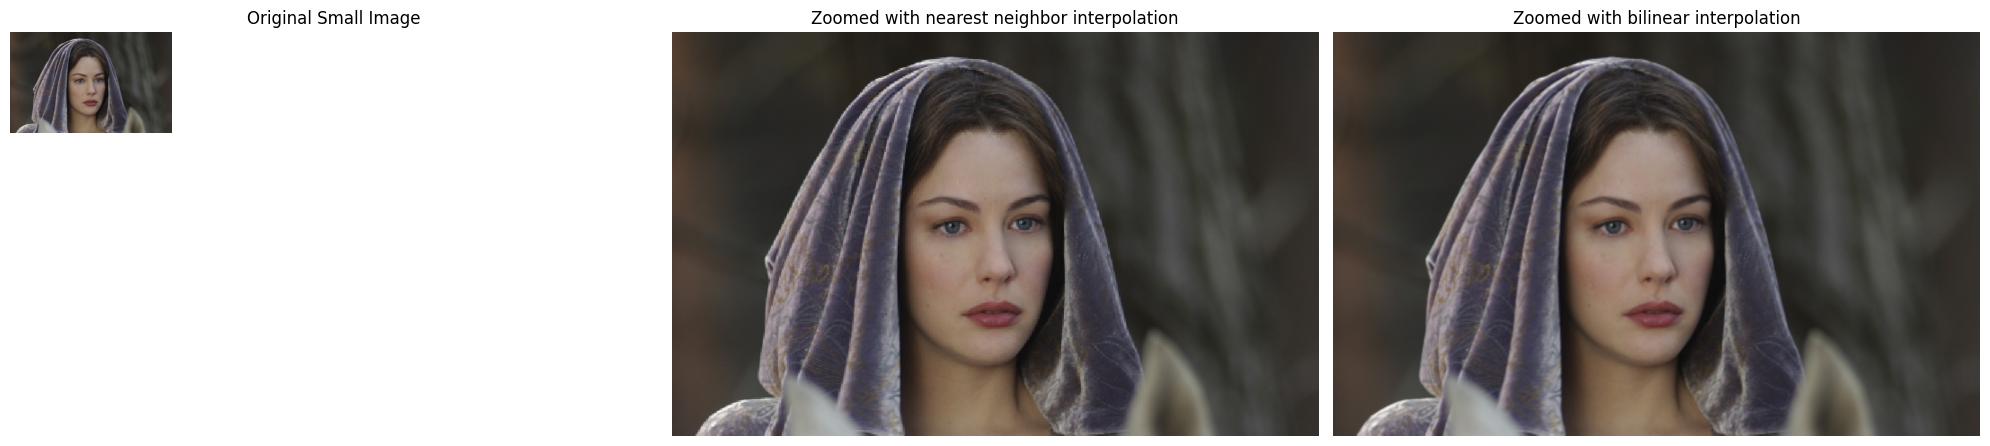

In [126]:

plt.figure(figsize = (20, 10))
plt.subplot(131)
plt.imshow(cv.cvtColor(img8, cv.COLOR_BGR2RGB))
plt.title('Original Small Image')
plt.xlim((0, zoomed_nn.shape[1]))
plt.ylim((zoomed_nn.shape[0], 0))
plt.axis('off')
plt.subplot(132)
plt.imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
plt.title('Zoomed with nearest neighbor interpolation')
plt.axis('off')
plt.subplot(133)
plt.imshow(cv.cvtColor(zoomed_bi, cv.COLOR_BGR2RGB))
plt.title('Zoomed with bilinear interpolation')
plt.axis('off')
plt.tight_layout()

In [132]:
for i in range(1, 12):
    num = str(i).zfill(2)
    small_image = cv.imread(f"images/zooming/im{num}small.png", cv.IMREAD_COLOR)
    large_image = cv.imread(f"images/zooming/im{num}.png", cv.IMREAD_COLOR)

    zoomed_nn = zoom(small_image, 4, "nn")
    zoomed_bi = zoom(small_image, 4, "bi")
    try:
        print(f"Image {num}: Nearest neighbors = {normalized_ssd(zoomed_nn, large_image)},\tBilinear = {normalized_ssd(zoomed_bi, large_image)}")
    except: pass

Image 01: Nearest neighbors = 0.0006168664775379207,	Bilinear = 0.0006037221557710472
Image 02: Nearest neighbors = 0.00025825407028279724,	Bilinear = 0.00024931605721446165
Image 04: Nearest neighbors = 0.0012573230016836275,	Bilinear = 0.00125580531543641
Image 05: Nearest neighbors = 0.0008397238286200464,	Bilinear = 0.0008259538420942087
Image 06: Nearest neighbors = 0.0005373686353222803,	Bilinear = 0.0005462159368508155
Image 07: Nearest neighbors = 0.0004702600674920704,	Bilinear = 0.0004647452514757946
Image 09: Nearest neighbors = 0.00043194078132342264,	Bilinear = 0.00041013587989662095


## Question 9

In [189]:
img9 = cv.imread("images/flower.png", cv.IMREAD_COLOR)
img9 = cv.cvtColor(img9, cv.COLOR_BGR2RGB)

mask = np.zeros(img9.shape[:2], np.uint8)   # Initial mask
mask[150:600, 50:612] = cv.GC_PR_FGD
mask[300:450, 250:430] = cv.GC_FGD
bgdModel = np.zeros((1, 65),np.float64) 
fgdModel = np.zeros((1, 65),np.float64)
rect = (50, 150, (612 - 50), (600 - 150))
iters = 15

cv.grabCut(img9, mask, rect, bgdModel, fgdModel, iters, cv.GC_INIT_WITH_MASK)
# Select pixels that are background or probably background as 0 and others as 1
foreground_mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8') 
background_mask = 1 - foreground_mask

foreground_img9 = img9 * foreground_mask[:, :, np.newaxis]
background_img9 = img9 * background_mask[:, :, np.newaxis]

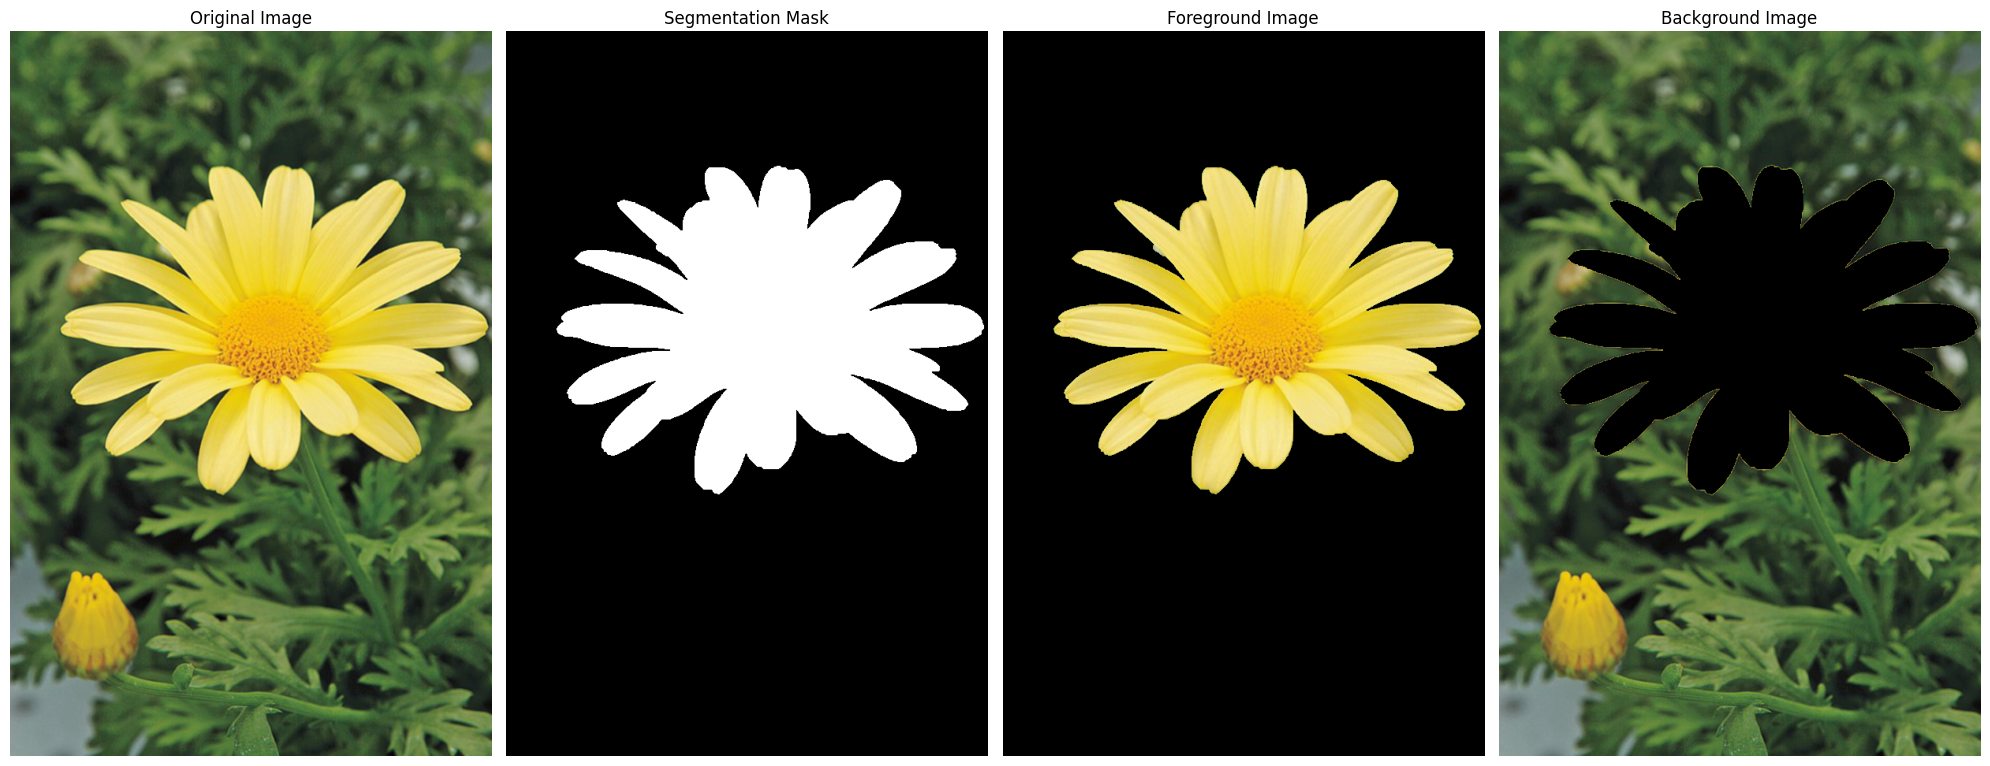

In [190]:
plt.figure(figsize = (20, 10))
plt.subplot(141)
plt.imshow(img9)
plt.title('Original Image')
plt.axis('off')
plt.subplot(142)
plt.imshow(foreground_mask, cmap = 'gray')
plt.title('Segmentation Mask')
plt.axis('off')
plt.subplot(143)
plt.imshow(foreground_img9)
plt.title('Foreground Image')
plt.axis('off')
plt.subplot(144)
plt.imshow(background_img9)
plt.title('Background Image')
plt.axis('off')
plt.tight_layout()

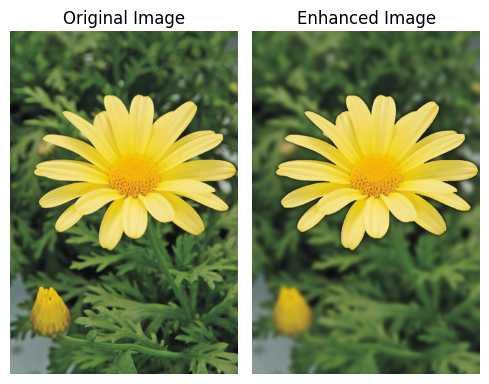

In [198]:
# Image with blurred background
kernel = 51
sigma = 5
blurred_background = cv.GaussianBlur(background_img9, (kernel, kernel), sigma)
blurred_background = blurred_background * background_mask[:, :, np.newaxis] 

final_img9 = blurred_background + foreground_img9

plt.figure(figsize = (5, 5))
plt.subplot(121)
plt.imshow(img9)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(final_img9)
plt.title('Enhanced Image')
plt.axis('off')
plt.tight_layout()